In [52]:
import re
import warnings
import pandas as pd

def eval_from_log(path:str):
    pattern = re.compile("= -?\d.\d\d\d\d?")
    
    v=[]

    for i, line in enumerate(open(path, 'r')):
        for match in re.finditer(pattern, line):
            # print(match.group()[0])
            v.append(float(match.group()[2:]))
    try:
        out = {'mAP': v[0], 'mAP.5': v[1], 'mAP.75': v[2], 'mAPs': v[3], 'mAPm': v[4], 'mAPl': v[5], 'LAMR': round(v[12], 3)}
    except IndexError:
        warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
        nan = float('NaN')
        out = {'mAP': nan, 'mAP.5': nan, 'mAP.75': nan, 'mAPs': nan, 'mAPm': nan, 'mAPl': nan, 'LAMR': nan}
    return out


def eval_df(paths, name=None):
    values = []
    for i, p in enumerate(paths):
        if isinstance(p, tuple):
            values.append(list(p[1].values()) + list(eval_from_log(p[0]).values()))
        else:
            values.append(list(eval_from_log(p).values()))

    if isinstance(p, tuple):
        df = pd.DataFrame(values, columns=list(p[1].keys()) + ['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(id_vars=list(p[1].keys()), var_name='metric')
    else:
        df = pd.DataFrame(values, columns=['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(var_name='metric')

    return df

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange
# sb.set_palette(sb.color_palette(['#179C7D','#52E5C3'])) # KIT green shades
sb.set_context('talk')
sb.set_style('darkgrid')

In [53]:
import string

PIROPO = []
PIROPO_FT = []
PIROPO_MW = []
PIROPO_FT_MW = []
GPA_PIROPO = []
PIROPO.append(('PIROPO/sweep/test2_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200,500,1000]:
    for l in range(10):
        PIROPO.append((f'PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT.append((f'PIROPO/sweep_ft/test2_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_MW.append((f'PIROPO_MW/sweep/test_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT_MW.append((f'PIROPO_MW/sweep_ft/test_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
 
PIROPO.append(('PIROPO/sweep/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT.append(('PIROPO/sweep_ft/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_MW.append(('PIROPO_MW/sweep/test_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT_MW.append(('PIROPO_MW/sweep_ft/test_all.txt', {'# training images': 2357, 'id': 'a'}))

for n in [1,2,5,10,20,50,100]:
    for l in range(10):
        GPA_PIROPO.append((f'GPA/coco_piropo_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))  

MW_18MAR = []
MW_PIROPO = []
MW_BOMNI = []
MW_18MAR.append(('MW-18Mar/sweep/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200]:
    for l in range(10):
        MW_18MAR.append((f'MW-18Mar/sweep/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_PIROPO.append((f'MW_PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_BOMNI.append((f'MW_BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
MW_18MAR.append(('MW-18Mar/sweep/test_all.txt', {'# training images': 819, 'id': 'a'}))
MW_PIROPO.append(('MW_PIROPO/sweep/test2_all.txt', {'# training images': 819, 'id': 'a'}))
MW_BOMNI.append(('MW_BOMNI/test_all.txt', {'# training images': 819, 'id': 'a'}))

PIROPOMW = [
    ('PIROPO+MW/sweep/MW-18Mar_test.txt', {'# training images': 3176, 'id': 'a'}),
    ('PIROPO+MW/sweep/PIROPO_omni_test2.txt', {'# training images': 3176, 'id': 'a'})
]

BOMNI = []
BOMNI.append(('BOMNI/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100]:
    for l in range(10):
        BOMNI.append((f'BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
BOMNI.append(('BOMNI/test_all.txt', {'# training images': 236, 'id': 'a'}))


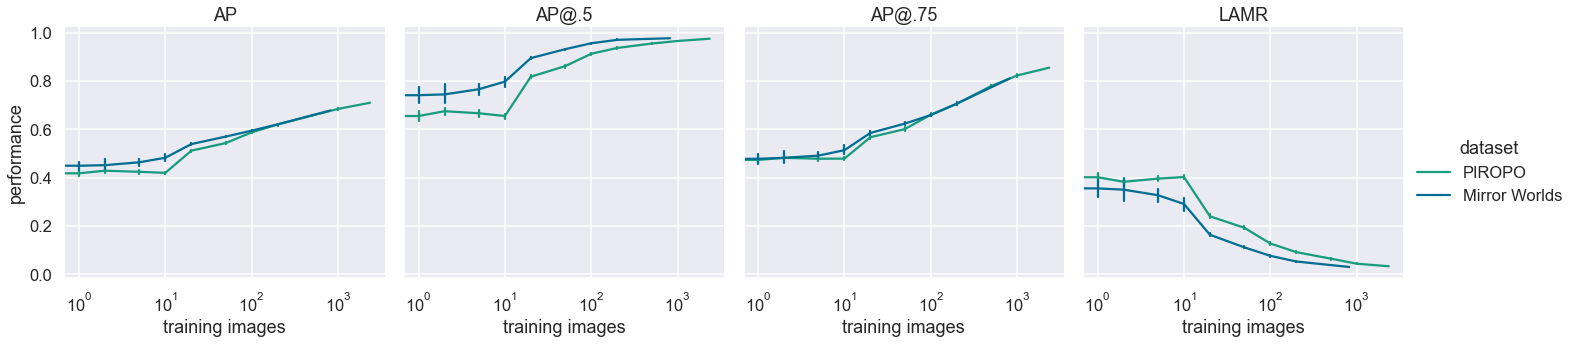

In [54]:
# baseline
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='dataset', value='PIROPO')

mw = eval_df(MW_18MAR)
mw.insert(loc=0, column='dataset', value='Mirror Worlds')

df = pd.concat([piropo, mw], ignore_index=True)

# sb.set(rc={'figure.figsize':(60,12)})
# sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange
# sb.set_context('talk')

# import matplotlib.pyplot as pyplot
# fig, ax = pyplot.subplots(figsize=(25, 5))

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric', hue='dataset', height=5, aspect=1.)
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')

g.savefig(f'images/baseline_piropo_mw_faulty.svg')

<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_20a.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_100a.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_100b.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')


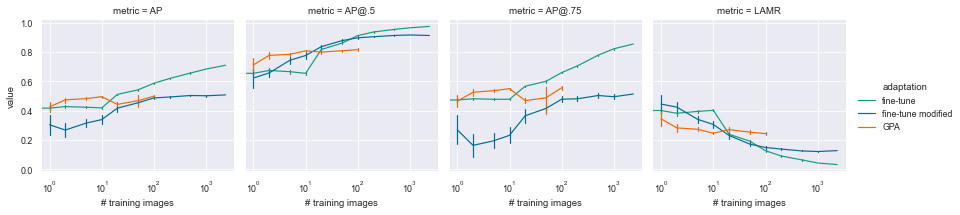

In [26]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='adaptation', value='fine-tune')

piropo_ft = eval_df(PIROPO_FT)
piropo_ft.insert(loc=0, column='adaptation', value='fine-tune modified')

gpa_piropo = eval_df(GPA_PIROPO)
gpa_piropo.insert(loc=0, column='adaptation', value='GPA')

df = pd.concat([piropo, piropo_ft, gpa_piropo], ignore_index=True)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric', hue='adaptation')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

# g.savefig('piropo.png')

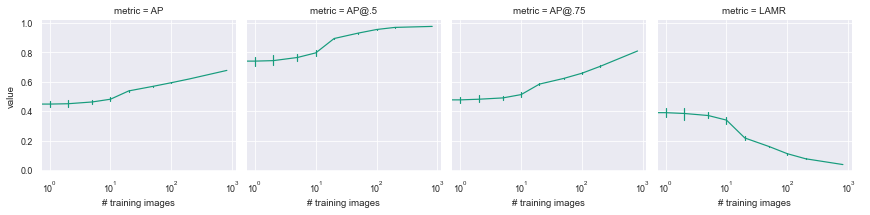

In [145]:
df = eval_df(MW_18MAR)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('mw-18mar.png')

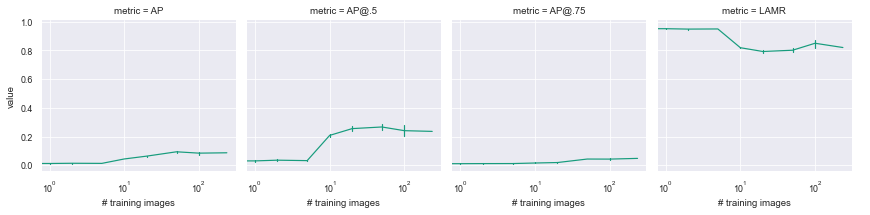

In [10]:
df = eval_df(BOMNI)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('bomni.png')

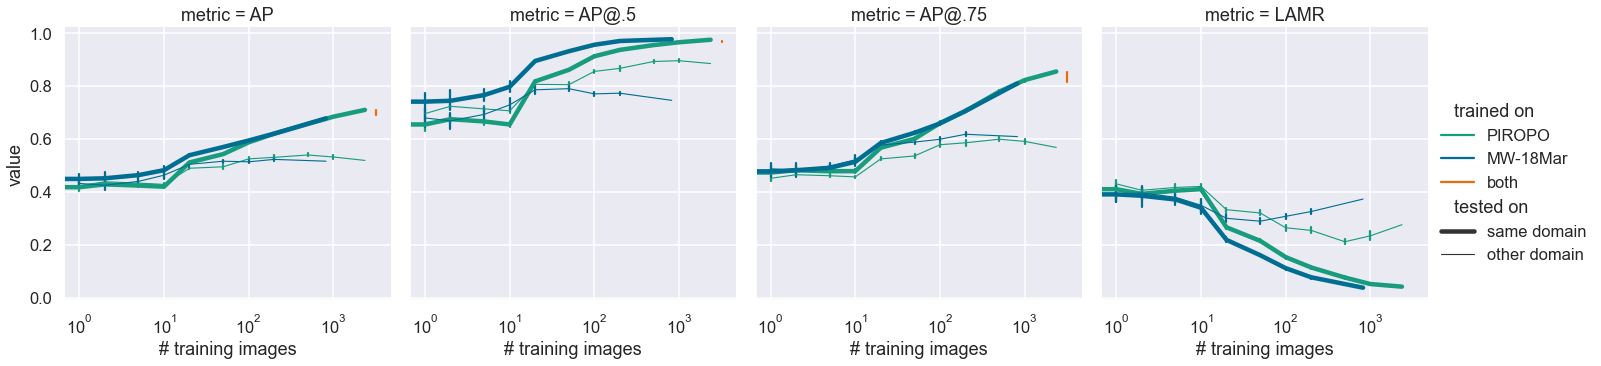

In [87]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='tested on', value='same domain')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='tested on', value='other domain')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='tested on', value='same domain')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='tested on', value='other domain')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='tested on', value='same domain')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='tested on', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

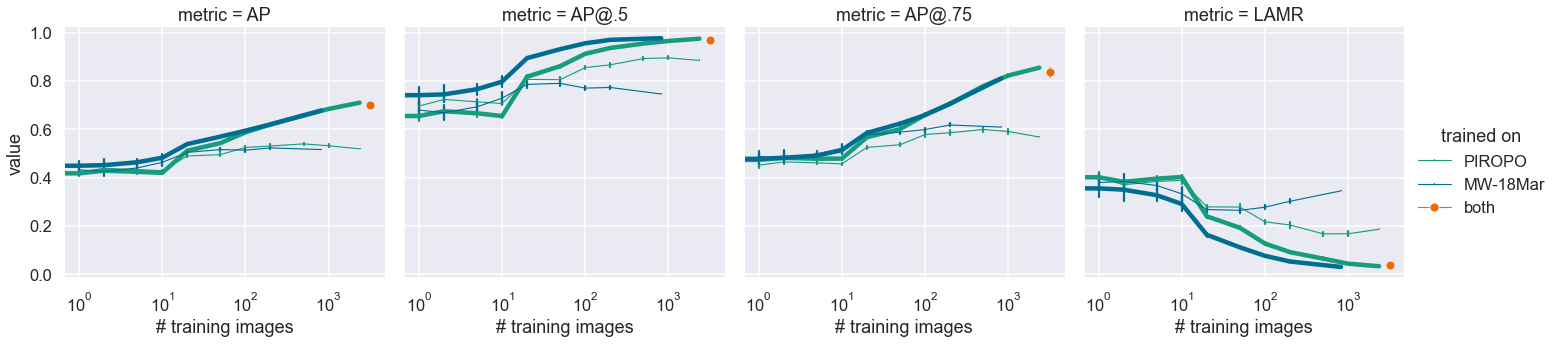

In [6]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='cross domain', value='no')
piropo.insert(loc=0, column='tested on', value='PIROPO')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='cross domain', value='yes')
piropo_mw.insert(loc=0, column='tested on', value='MW-18Mar')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='cross domain', value='no')
mw_18mar.insert(loc=0, column='tested on', value='MW-18Mar')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='cross domain', value='yes')
mw_piropo.insert(loc=0, column='tested on', value='PIROPO')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='cross domain', value='no')
piropomw.insert(loc=0, column='tested on', value='both')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.FacetGrid(df, col='metric', hue='trained on', hue_kws={'marker': [',',',','o']}, height=5)
g.map(sb.lineplot, '# training images', 'value', err_style='bars', size=df['cross domain'])
g.add_legend(adjust_subtitles=True)
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

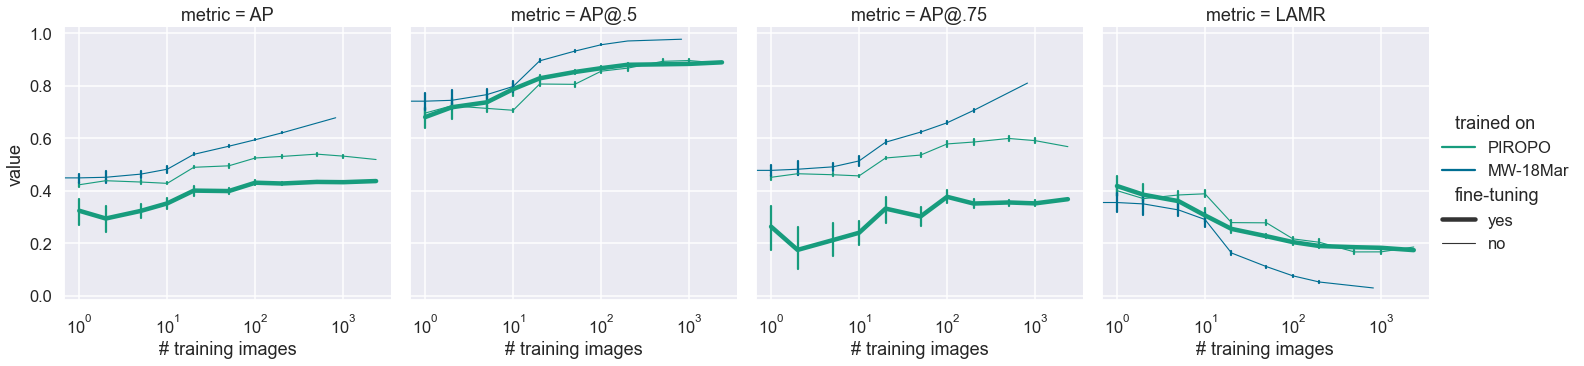

In [12]:
# piropo = eval_df(PIROPO)
# piropo.insert(loc=0, column='tested on', value='same domain')
# piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='fine-tuning', value='no')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

piropo_ft_mw = eval_df(PIROPO_FT_MW)
piropo_ft_mw.insert(loc=0, column='fine-tuning', value='yes')
piropo_ft_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='fine-tuning', value='no')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

# mw_piropo = eval_df(MW_PIROPO)
# mw_piropo.insert(loc=0, column='tested on', value='other domain')
# mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

# piropomw = eval_df(PIROPOMW)
# piropomw.insert(loc=0, column='tested on', value='same domain')
# piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo_ft_mw, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='fine-tuning', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')